In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib



df = pd.read_csv("maps-synthetic-data-v1.1.csv")
pd.options.display.max_columns = None
display(df)
#df.head()

,Unnamed: 0,X,flag,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,talk_mob_wend,comp_wend,musi_wend,read_wend,work_wend,alon_wend,draw_wend,play_wend,tv_wend,out_win_wend,out_sum_wend,tran_wend,talk_phon_week,text_week,talk_mob_week,comp_week,musi_week,read_week,work_week,alon_week,draw_week,play_week,tv_week,out_win_week,out_sum_week,tran_week,pat_pres_10,pat_pres_8,pat_pres,num_home,mat_anx_1,mat_anx_18m,mat_anx_8m,agg_score,emot_cruel,phys_cruel,mat_anx_0m,pat_ses,mat_ses,pat_edu,mat_edu,parity,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07,exercise,child_bull,phone_14_wend,phone_14_week,musi_13,tv_bed_9,own_mob,has_dep_diag,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
0,1,1,synthetic,NaN,3.0,30,59.294132,181.602831,107.0,NaN,NaN,Any at all,Less than 1 hour,Less than 1 hour,1-2 hours,Not at all,Less than 1 hour,3 or more hours,1-2 hours,Not at all,3 or more hours,1-2 hours,3 or more hours,3 or more hours,Less than 1 hour,Not at all,Less than 1 hour,Less than 1 hour,1-2 hours,Not at all,Less than 1 hour,3 or more hours,1-2 hours,Not at all,3 or more hours,1-2 hours,3 or more hours,3 or more hours,Less than 1 hour,Yes,Yes,Yes,4,No,No,No,11.0,No,No,No,III (manual),ii,A level,A level,0.0,~0.5%,~0.5%,~0.5%,~0.5%,~0.5%,~0.5%,~3%,~3%,5 or more times a week,No,NaN,NaN,NaN,NaN,NaN,No ICD-10 diagnosis of depression,0.0,0.0,0.0,NaN,0.0,Yes,Yes,often,No,"Yes, Some Days",Other,"Yes, Every Day",Female,A
1,2,2,synthetic,NaN,9.0,26,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,No,No,No,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,B
2,3,3,synthetic,NaN,3.0,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,No,No,No,III (manual),iv,O level,O level,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, Some Days","Yes, Every Day",Other,Male,A
3,4,4,synthetic,No,NaN,22,49.812426,160.224186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,III (manual),i,O level,A level,0.0,NaN,NaN,<0.1%,NaN,NaN,NaN,~0.5%,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Male,A
4,5,5,synthetic,No,8.0,31,62.270030,191.703227,132.0,Yes,NaN,Not at all,Not at all,Not at all,Less than 1 hour,Not at all,1 or more hours,1-2 hours,3 or more hours,Not at all,Less than 3 hours,3 or more hours,Less than 1 hour,Less than 3 hours,Less than 1 hour,Not at all,Not at all,Not at all,1-2 hours,Not at all,1 or more hours,1-2 hours,1-2 hours,Not at all,3 or more hours,1-2 hours,Less than 1 hour,Less than 3 hours,Less than 1 hour,NaN,NaN,No,4,No,No,No,9.0,Yes,No,No,III (manual),iv,A level,A level,1.0,<0.1%,<0.1%,<0.1%,NaN,~3%,~0.5%,~0.5%,NaN,1-4 times a week,No,Not at all,Not at all,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,often,No,"Yes, Some Days","Yes, Every Day","Yes, Every Day",Female,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,13730,13730,synthetic,NaN,13.0,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,No,No,Yes,NaN,NaN,NaN

<AxesSubplot:>

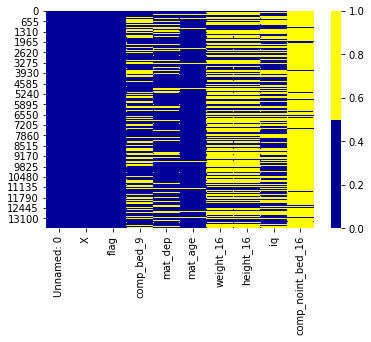

In [2]:
cols = df.columns[:10] # first 10 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
X - 0%
flag - 0%
comp_bed_9 - 40%
mat_dep - 19%
mat_age - 3%
weight_16 - 61%
height_16 - 61%
iq - 47%
comp_noint_bed_16 - 97%
comp_int_bed_16 - 81%
talk_phon_wend - 65%
text_wend - 65%
talk_mob_wend - 65%
comp_wend - 65%
musi_wend - 65%
read_wend - 65%
work_wend - 65%
alon_wend - 65%
draw_wend - 65%
play_wend - 65%
tv_wend - 65%
out_win_wend - 65%
out_sum_wend - 65%
tran_wend - 65%
talk_phon_week - 64%
text_week - 64%
talk_mob_week - 63%
comp_week - 64%
musi_week - 64%
read_week - 64%
work_week - 64%
alon_week - 64%
draw_week - 64%
play_week - 63%
tv_week - 63%
out_win_week - 64%
out_sum_week - 63%
tran_week - 63%
pat_pres_10 - 41%
pat_pres_8 - 44%
pat_pres - 30%
num_home - 30%
mat_anx_1 - 29%
mat_anx_18m - 28%
mat_anx_8m - 24%
agg_score - 22%
emot_cruel - 18%
phys_cruel - 18%
mat_anx_0m - 18%
pat_ses - 20%
mat_ses - 26%
pat_edu - 22%
mat_edu - 10%
parity - 9%
dep_band_15 - 61%
dep_band_13 - 49%
dep_band_10 - 44%
dep_band_07 - 41%
anx_band_15 - 61%
anx_band_13 - 48%
anx

<AxesSubplot:xlabel='index'>

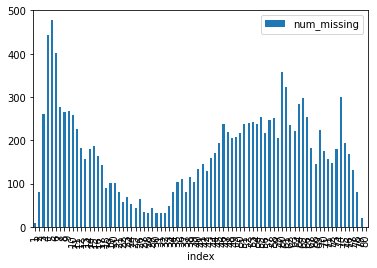

In [4]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        #print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [22]:
# no need to run
# drop rows with a lot of missing values.
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

In [ ]:
# no need to run
#calculate median for missing vlaues
med = df[''].median()
print(med)
df[''] = df[''].fillna(med)